In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

url = 'D:\\__Max__\\Documents\\Machine Learning Course LANIA\\Recursos complementarios-20210804\\Datasets\\Failure prediction.csv'
failure = pd.read_csv(url)
failure.shape

(700, 9)

In [5]:
print(failure.describe())
failure.head

           Random  Machine nbr    lifetime  pressureInd  moistureInd  \
count  700.000000   700.000000  700.000000   700.000000   700.000000   
mean     0.500803   506.242857   54.910000    98.506610    99.683866   
std      0.293198   288.266857   26.691994    20.219140    10.054357   
min      0.000989     2.000000    1.000000    33.481917    58.547301   
25%      0.245743   256.750000   32.750000    85.694034    92.807344   
50%      0.492816   508.500000   60.000000    96.650895    99.843030   
75%      0.748046   753.250000   80.000000   112.005435   106.304672   
max      0.996737   999.000000   93.000000   173.282541   128.595038   

       temperatureInd        team    provider  
count      700.000000  700.000000  700.000000  
mean       100.834717    2.000000    2.462857  
std         19.885707    0.804138    1.101458  
min         42.279598    1.000000    1.000000  
25%         87.224880    1.000000    1.000000  
50%        100.789181    2.000000    2.000000  
75%        113.

<bound method NDFrame.head of     GOAL-Broken    Random  Machine nbr  lifetime  pressureInd  moistureInd  \
0           Yes  0.437420          723        60    77.836105   112.832544   
1           Yes  0.688345          107        88    89.350620    95.228125   
2            No  0.805670          153        30   130.089477    96.367747   
3           Yes  0.923187          140        79    87.421990   110.941574   
4            No  0.036583          359         2    69.939898    86.292387   
..          ...       ...          ...       ...          ...          ...   
695         Yes  0.948387          261        85    92.508778   106.551167   
696         Yes  0.101953          443        65    83.030446   107.653848   
697          No  0.954807          395        27    86.070644   104.915031   
698          No  0.994222          409         4    89.999437   104.972912   
699         Yes  0.821620          741        80    77.120838   103.721079   

     temperatureInd  team  provid

In [6]:
mask = failure['GOAL-Broken']=='Yes'
failure[mask]

,GOAL-Broken,Random,Machine nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider
0,Yes,0.437420,723,60,77.836105,112.832544,121.786371,3,3
1,Yes,0.688345,107,88,89.350620,95.228125,99.082317,1,4
3,Yes,0.923187,140,79,87.421990,110.941574,129.691510,2,1
5,Yes,0.716907,10,81,97.501826,92.228039,80.800159,3,4
11,Yes,0.046902,301,80,104.362706,88.176780,80.273680,2,1
...,...,...,...,...,...,...,...,...,...
685,Yes,0.989879,539,92,111.273042,84.027751,122.196843,1,2
692,Yes,0.106995,646,92,108.339385,102.176562,121.325906,1,2
695,Yes,0.948387,261,85,92.508778,106.551167,106.547967,3,2
696,Yes,0.101953,443,65,83.030446,107.653848,92.026243,1,3


In [7]:
failure.loc[failure['GOAL-Broken']=='Yes']

,GOAL-Broken,Random,Machine nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider
0,Yes,0.437420,723,60,77.836105,112.832544,121.786371,3,3
1,Yes,0.688345,107,88,89.350620,95.228125,99.082317,1,4
3,Yes,0.923187,140,79,87.421990,110.941574,129.691510,2,1
5,Yes,0.716907,10,81,97.501826,92.228039,80.800159,3,4
11,Yes,0.046902,301,80,104.362706,88.176780,80.273680,2,1
...,...,...,...,...,...,...,...,...,...
685,Yes,0.989879,539,92,111.273042,84.027751,122.196843,1,2
692,Yes,0.106995,646,92,108.339385,102.176562,121.325906,1,2
695,Yes,0.948387,261,85,92.508778,106.551167,106.547967,3,2
696,Yes,0.101953,443,65,83.030446,107.653848,92.026243,1,3


In [12]:
features = failure.iloc[:,1:]
target = failure['GOAL-Broken']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)
print('Número de instancias de entrenamiento: '+str(len(x_train)))
print('Número de instancias de prueba: '+str(len(x_test)))
print('Número de instancias totales: '+str(len(failure.index)))

Número de instancias de entrenamiento: 560
Número de instancias de prueba: 140
Número de instancias totales: 700


In [18]:
RL = LogisticRegression(solver='liblinear')
RL.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [19]:
prediccion = RL.predict(x_test)
prediccion

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes

In [35]:
PP = RL.predict_proba(x_test)
print("     Falla        No-falla")
print(PP)

print("\n Probabilidades de no fallar")
print(PP[:,0])

     Falla        No-falla
[[7.45825130e-01 2.54174870e-01]
 [9.98238230e-01 1.76176961e-03]
 [3.56420855e-01 6.43579145e-01]
 [7.32901997e-02 9.26709800e-01]
 [1.13557592e-01 8.86442408e-01]
 [1.34117651e-01 8.65882349e-01]
 [9.88746360e-01 1.12536402e-02]
 [8.02667165e-01 1.97332835e-01]
 [4.47479692e-01 5.52520308e-01]
 [7.20158472e-01 2.79841528e-01]
 [6.19536921e-02 9.38046308e-01]
 [9.25404600e-01 7.45954005e-02]
 [9.66474056e-01 3.35259437e-02]
 [9.68178511e-01 3.18214888e-02]
 [5.23778244e-01 4.76221756e-01]
 [9.17108220e-02 9.08289178e-01]
 [1.27609680e-01 8.72390320e-01]
 [4.54971249e-01 5.45028751e-01]
 [7.91489330e-01 2.08510670e-01]
 [1.03446452e-01 8.96553548e-01]
 [6.29765320e-01 3.70234680e-01]
 [9.90229084e-01 9.77091570e-03]
 [1.41558686e-01 8.58441314e-01]
 [1.64421168e-01 8.35578832e-01]
 [8.95167022e-01 1.04832978e-01]
 [3.63283754e-01 6.36716246e-01]
 [9.94833231e-01 5.16676944e-03]
 [3.37606244e-01 6.62393756e-01]
 [9.23664435e-01 7.63355651e-02]
 [8.96111346e-02

In [37]:
CM = confusion_matrix(y_test, prediccion)
CM

array([[65, 15],
       [10, 50]], dtype=int64)

In [38]:
print(classification_report(y_test, prediccion))

              precision    recall  f1-score   support

          No       0.87      0.81      0.84        80
         Yes       0.77      0.83      0.80        60

    accuracy                           0.82       140
   macro avg       0.82      0.82      0.82       140
weighted avg       0.82      0.82      0.82       140



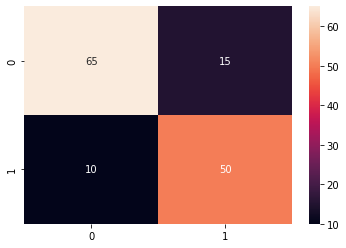

In [40]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(CM, annot=True)
plt.show()

In [41]:
DT = DecisionTreeClassifier()
DT = DT.fit(x_train, y_train)
predict_test = DT.predict(x_test)
predict_test

array(['Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No']

In [42]:
accuracy_score(y_test, predict_test)

0.95

In [43]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

          No       0.97      0.94      0.96        80
         Yes       0.92      0.97      0.94        60

    accuracy                           0.95       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140



In [44]:
importances = pd.DataFrame({'Característica':x_train.columns, 'Importancia':np.round(DT.feature_importances_,3)})
importances = importances.sort_values('Importancia', ascending=False)
importances

,Característica,Importancia
2,lifetime,0.717
7,provider,0.155
6,team,0.046
3,pressureInd,0.025
4,moistureInd,0.024
1,Machine nbr,0.018
0,Random,0.008
5,temperatureInd,0.007


In [46]:
MC = confusion_matrix(y_test, predict_test)
print(MC)

[[75  5]
 [ 2 58]]


<function matplotlib.pyplot.show(close=None, block=None)>

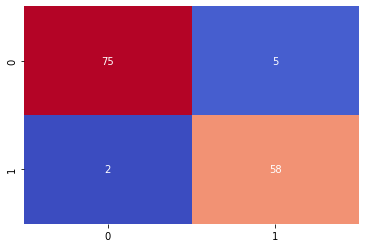

In [47]:
sn.heatmap(MC, annot=True, cbar=False, cmap="coolwarm")
plt.show

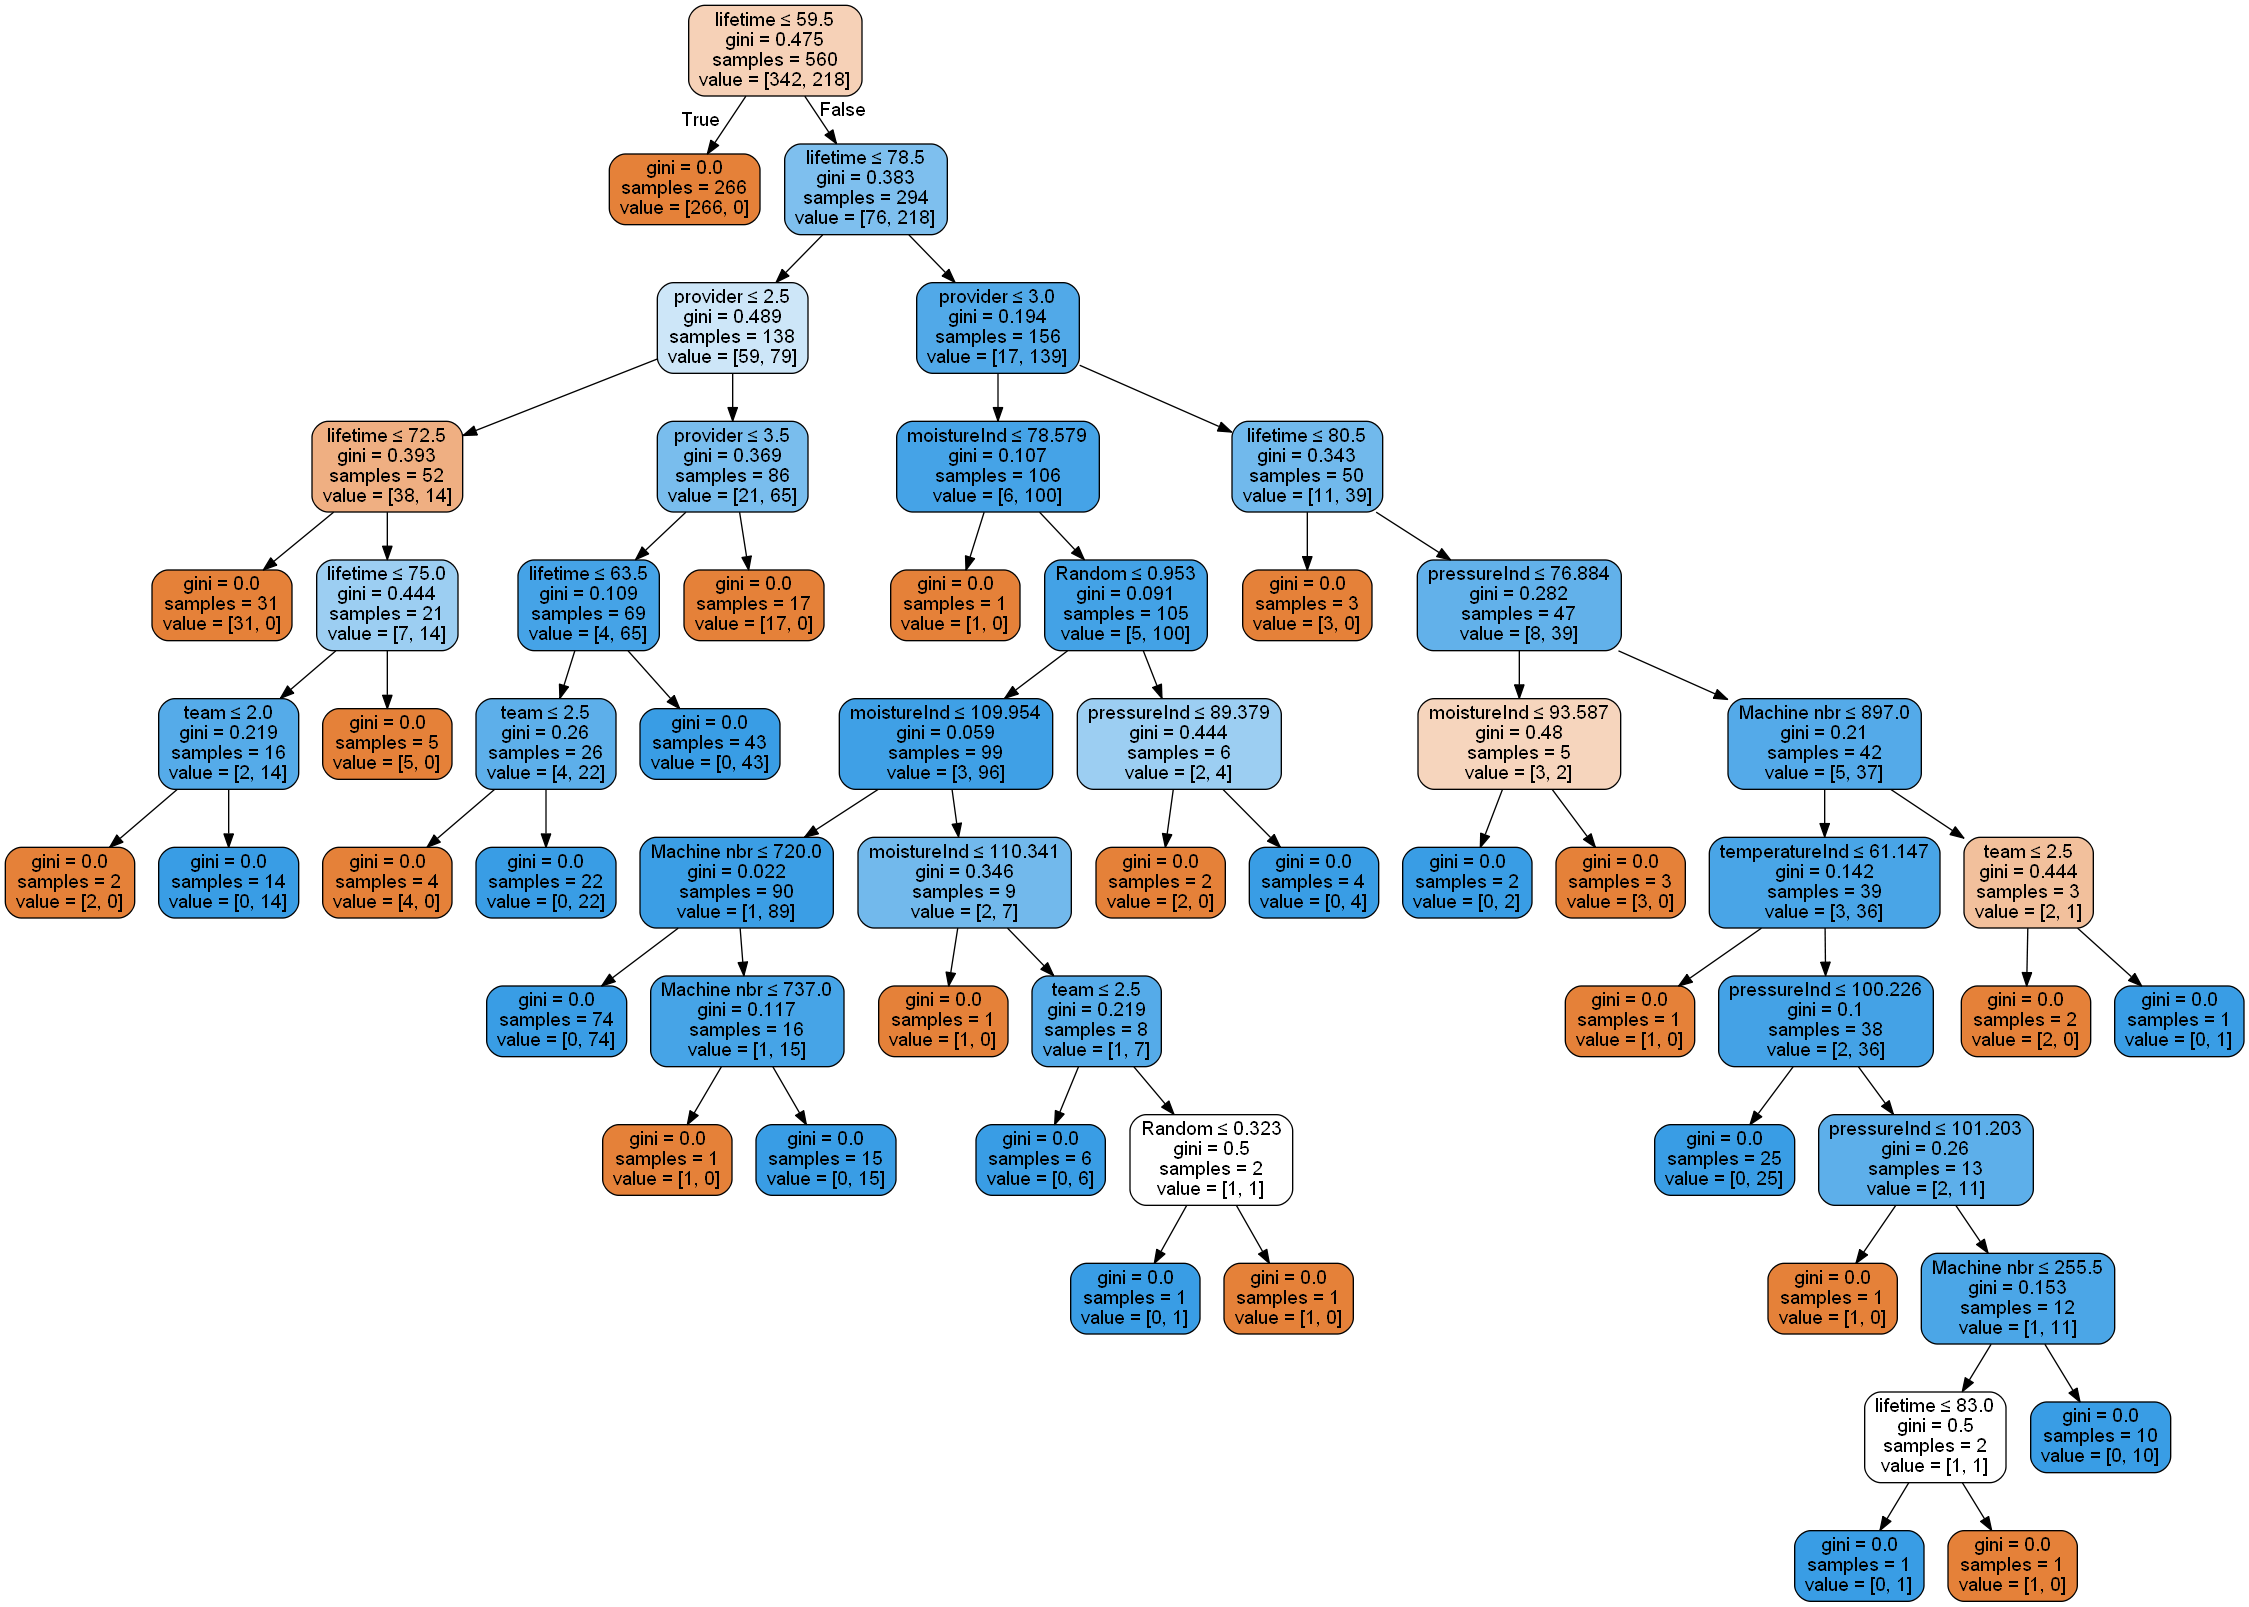

In [49]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()

export_graphviz(DT, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=x_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('failure.png')
Image(graph.create_png())